In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px
import math
import numpy as np
import mplcursors as mpc
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='sgoolsby88', api_key='0WOhFGxjFXgaIs7wkXSB')

In [2]:
animals_slaughtered = pd.read_csv('../data/animals-slaughtered-for-meat.csv')

In [3]:
global_production = pd.read_csv('../data/global-meat-production-by-livestock-type.csv')

In [4]:
animals_slaughtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13853 entries, 0 to 13852
Data columns (total 9 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    13853 non-null  object 
 1   Code                                                                                      11274 non-null  object 
 2   Year                                                                                      13853 non-null  int64  
 3   Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals           13583 non-null  float64
 4   Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals             12387 non-null  float64
 5   Meat, chicken | 00001058 || Producing or slaughtered a

In [5]:
animals_slaughtered.isna().sum()

Entity                                                                                         0
Code                                                                                        2579
Year                                                                                           0
Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals              270
Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals               1466
Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals             124
Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals             7828
Meat, pig | 00001035 || Producing or slaughtered animals | 005320 || animals                1158
Meat, lamb and mutton | 00000977 || Producing or slaughtered animals | 005320 || animals    1139
dtype: int64

In [6]:
animals_slaughtered

Entity Code  Year  \
0      Afghanistan  AFG  1961   
1      Afghanistan  AFG  1962   
2      Afghanistan  AFG  1963   
3      Afghanistan  AFG  1964   
4      Afghanistan  AFG  1965   
...            ...  ...   ...   
13848     Zimbabwe  ZWE  2016   
13849     Zimbabwe  ZWE  2017   
13850     Zimbabwe  ZWE  2018   
13851     Zimbabwe  ZWE  2019   
13852     Zimbabwe  ZWE  2020   

       Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals  \
0                                               360000.0                                 
1                                               384000.0                                 
2                                               396000.0                                 
3                                               402000.0                                 
4                                               408000.0                                 
...                                                  ...                                 
13848                                           284689.0                                 
13849                                           262990.0                                 
13850                                           266228.0                                 
13851                                           235027.0                                 
13852                                           231257.0                                 

       Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals  \
0                                               940000.0                               
1                                               875000.0                               
2                                               810000.0                               
3                                               750000.0                               
4                                               875000.0                               
...                                                  ...                               
13848                                          1430664.0                               
13849                                          2006078.0                               
13850                                          2099581.0                               
13851                                          2060377.0                               
13852                                          2089283.0                               

       Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals  \
0                                              7000000.0                                  
1                                              7500000.0                                  
2                                              7700000.0                                  
3                                              8000000.0                                  
4                                              8500000.0                                  
...                                                  ...                                  
13848                                         58000000.0                                  
13849                                         60000000.0                                  
13850                                         57000000.0                                  
13851                                         58333000.0                                  
13852                                         58444000.0                                  

       Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals  \
0                                                    NaN                                 
1                                                    NaN                                 
2                                                    NaN                                 
3                       

### Renamed columns to simplify

In [7]:
animals_slaughtered=animals_slaughtered.rename(columns={'Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals':'Cattle (beef and buffalo) Meat','Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals':'Goat Meat','Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals':'Chicken Meat','Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals':'Turkey Meat','Meat, pig | 00001035 || Producing or slaughtered animals | 005320 || animals':'Pig Meat','Meat, lamb and mutton | 00000977 || Producing or slaughtered animals | 005320 || animals':'Lamb and Mutton Meat'})
animals_slaughtered

Entity Code  Year  Cattle (beef and buffalo) Meat  Goat Meat  \
0      Afghanistan  AFG  1961                        360000.0   940000.0   
1      Afghanistan  AFG  1962                        384000.0   875000.0   
2      Afghanistan  AFG  1963                        396000.0   810000.0   
3      Afghanistan  AFG  1964                        402000.0   750000.0   
4      Afghanistan  AFG  1965                        408000.0   875000.0   
...            ...  ...   ...                             ...        ...   
13848     Zimbabwe  ZWE  2016                        284689.0  1430664.0   
13849     Zimbabwe  ZWE  2017                        262990.0  2006078.0   
13850     Zimbabwe  ZWE  2018                        266228.0  2099581.0   
13851     Zimbabwe  ZWE  2019                        235027.0  2060377.0   
13852     Zimbabwe  ZWE  2020                        231257.0  2089283.0   

       Chicken Meat  Turkey Meat  Pig Meat  Lamb and Mutton Meat  
0         7000000.0          NaN       NaN             4336000.0  
1         7500000.0          NaN       NaN             4355000.0  
2         7700000.0          NaN       NaN             4673000.0  
3         8000000.0          NaN       NaN             5010000.0  
4         8500000.0          NaN       NaN             5179000.0  
...             ...          ...       ...                   ...  
13848    58000000.0      28000.0  420577.0               43166.0  
13849    60000000.0      29000.0  211228.0               29918.0  
13850    57000000.0      30000.0  174010.0               23767.0  
13851    58333000.0      30000.0  193820.0               31884.0  
13852    58444000.0      31000.0  183923.0               32462.0  

[13853 rows x 9 columns]

### Narrowed down from 1975 to 2016 to match BMI dataframes

In [8]:
mask=(animals_slaughtered['Year']>= 1975)&(animals_slaughtered['Year']<= 2016)
animals_slaughtered=animals_slaughtered[mask]
animals_slaughtered

Entity Code  Year  Cattle (beef and buffalo) Meat  Goat Meat  \
14     Afghanistan  AFG  1975                        511500.0  1500000.0   
15     Afghanistan  AFG  1976                        523500.0  1500000.0   
16     Afghanistan  AFG  1977                        541000.0  1020000.0   
17     Afghanistan  AFG  1978                        557000.0  1020000.0   
18     Afghanistan  AFG  1979                        590000.0  1080000.0   
...            ...  ...   ...                             ...        ...   
13844     Zimbabwe  ZWE  2012                        336151.0  1960000.0   
13845     Zimbabwe  ZWE  2013                        328594.0  2000000.0   
13846     Zimbabwe  ZWE  2014                        247224.0  2040000.0   
13847     Zimbabwe  ZWE  2015                        257525.0  1829990.0   
13848     Zimbabwe  ZWE  2016                        284689.0  1430664.0   

       Chicken Meat  Turkey Meat  Pig Meat  Lamb and Mutton Meat  
14       13000000.0          NaN       NaN             6270000.0  
15       13000000.0          NaN       NaN             7800000.0  
16       13500000.0          NaN       NaN             7750000.0  
17       14000000.0          NaN       NaN             8000000.0  
18       15000000.0          NaN       NaN             7750000.0  
...             ...          ...       ...                   ...  
13844    55500000.0      27000.0  362000.0               26800.0  
13845    55500000.0      27000.0  370000.0               27000.0  
13846    50000000.0      28000.0  378000.0               28000.0  
13847    53000000.0      29000.0  400000.0               39870.0  
13848    58000000.0      28000.0  420577.0               43166.0  

[9805 rows x 9 columns]

### United States animals slaughtered for consumption by year (1975-2016)

In [9]:
us_slaughtered=animals_slaughtered[animals_slaughtered['Entity']== 'United States']
us_slaughtered

Entity Code  Year  Cattle (beef and buffalo) Meat  Goat Meat  \
13027  United States  USA  1975                      46870608.0        NaN   
13028  United States  USA  1976                      48726000.0        NaN   
13029  United States  USA  1977                      48073504.0        NaN   
13030  United States  USA  1978                      44272272.0        NaN   
13031  United States  USA  1979                      36931536.0        NaN   
13032  United States  USA  1980                      36794896.0        NaN   
13033  United States  USA  1981                      38149008.0        NaN   
13034  United States  USA  1982                      39258000.0        NaN   
13035  United States  USA  1983                      40135600.0        NaN   
13036  United States  USA  1984                      41269008.0        NaN   
13037  United States  USA  1985                      40048000.0        NaN   
13038  United States  USA  1986                      41046000.0        NaN   
13039  United States  USA  1987                      38792000.0        NaN   
13040  United States  USA  1988                      37889008.0        NaN   
13041  United States  USA  1989                      36329008.0        NaN   
13042  United States  USA  1990                      35277008.0        NaN   
13043  United States  USA  1991                      34368400.0   569457.0   
13044  United States  USA  1992                      34488900.0   617231.0   
13045  United States  USA  1993                      34746000.0   599863.0   
13046  United States  USA  1994                      35691600.0   594840.0   
13047  United States  USA  1995                      37294500.0   556714.0   
13048  United States  USA  1996                      38575600.0   566891.0   
13049  United States  USA  1997                      38110900.0   488071.0   
13050  United States  USA  1998                      37137800.0   410533.0   
13051  United States  USA  1999                      37641800.0   654019.0   
13052  United States  USA  2000                      37587800.0   662658.0   
13053  United States  USA  2001                      36576400.0   685318.0   
13054  United States  USA  2002                      36970000.0   716087.0   
13055  United States  USA  2003                      36686200.0   709471.0   
13056  United States  USA  2004                      33759700.0   707099.0   
13057  United States  USA  2005                      33311400.0   738855.0   
13058  United States  USA  2006                      34596600.0   749400.0   
13059  United States  USA  2007                      35209200.0   827300.0   
13060  United States  USA  2008                      35497600.0   865800.0   
13061  United States  USA  2009                      34449200.0   839000.0   
13062  United States  USA  2010                      35285000.0   779100.0   
13063  United States  USA  2011                      35087500.0   773800.0   
13064  United States  USA  2012                      33861900.0   727400.0   
13065  United States  USA  2013                      33352500.0   689200.0   
13066  United States  USA  2014                      30857300.0   634000.0   
13067  United States  USA  2015                      29320300.0   590700.0   
13068  United States  USA  2016                      31188800.0   577500.0   

       Chicken Meat  Turkey Meat     Pig Meat  Lamb and Mutton Meat  
13027  3.093753e+09  119445000.0   69880000.0             8047000.0  
13028  3.432883e+09  134337000.0   74965008.0             6911000.0  
13029  3.526947e+09  128050000.0   78447008.0             6554784.0  
13030  3.707278e+09  131801000.0   78401008.0             5542903.0  
13031  4.044336e+09  146112000.0   90169008.0             5189000.0  
13032  4.132164e+09  159055000.0   97174000.0             5742000.0  
13033  4.277884e+09  166247000.0   92470000.0             6197000.0  
13034  4.269947e+09  160376000.0   82845008.0             6644000.0  
13035  4.310695e+09  16495900

In [10]:
us_slaughtered2=us_slaughtered.drop(['Entity','Code','Goat Meat'],axis=1)

us_slaughtered2

Year  Cattle (beef and buffalo) Meat  Chicken Meat  Turkey Meat  \
13027  1975                      46870608.0  3.093753e+09  119445000.0   
13028  1976                      48726000.0  3.432883e+09  134337000.0   
13029  1977                      48073504.0  3.526947e+09  128050000.0   
13030  1978                      44272272.0  3.707278e+09  131801000.0   
13031  1979                      36931536.0  4.044336e+09  146112000.0   
13032  1980                      36794896.0  4.132164e+09  159055000.0   
13033  1981                      38149008.0  4.277884e+09  166247000.0   
13034  1982                      39258000.0  4.269947e+09  160376000.0   
13035  1983                      40135600.0  4.310695e+09  164959000.0   
13036  1984                      41269008.0  4.459000e+09  163619000.0   
13037  1985                      40048000.0  4.727800e+09  175164000.0   
13038  1986                      41046000.0  4.617092e+09  196873000.0   
13039  1987                      38792000.0  5.169395e+09  231075000.0   
13040  1988                      37889008.0  5.351040e+09  237453000.0   
13041  1989                      36329008.0  5.681082e+09  251750000.0   
13042  1990                      35277008.0  6.022450e+09  271199000.0   
13043  1991                      34368400.0  6.313650e+09  276835000.0   
13044  1992                      34488900.0  6.602337e+09  281404000.0   
13045  1993                      34746000.0  6.856901e+09  276245000.0   
13046  1994                      35691600.0  7.239595e+09  278911000.0   
13047  1995                      37294500.0  7.530847e+09  281032000.0   
13048  1996                      38575600.0  7.699858e+09  293290000.0   
13049  1997                      38110900.0  7.903539e+09  290230000.0   
13050  1998                      37137800.0  8.006980e+09  273013000.0   
13051  1999                      37641800.0  8.288000e+09  265300000.0   
13052  2000                      37587800.0  8.430000e+09  268100000.0   
13053  2001                      36576400.0  8.614000e+09  269000000.0   
13054  2002                      36970000.0  8.716099e+09  271244000.0   
13055  2003                      36686200.0  8.684434e+09  267781000.0   
13056  2004                      33759700.0  8.895748e+09  254308000.0   
13057  2005                      33311400.0  9.000473e+09  248094000.0   
13058  2006                      34596600.0  8.968666e+09  254716000.0   
13059  2007                      35209200.0  9.035620e+09  264926000.0   
13060  2008                      35497600.0  9.075112e+09  271265000.0   
13061  2009                      34449200.0  8.658603e+09  245812000.0   
13062  2010                      35285000.0  8.790284e+09  242619000.0   
13063  2011                      35087500.0  8.683643e+09  246844000.0   
13064  2012                      33861900.0  8.576195e+09  250192000.0   
13065  2013                      33352500.0  8.648756e+09  239404000.0   
13066  2014                      30857300.0  8.669628e+09  236617000.0   
13067  2015                      29320300.0  8.822692e+09  232389000.0   
13068  2016                      31188800.0  8.908986e+09  243255000.0   

          Pig Meat  Lamb and Mutton Meat  
13027   69880000.0             8047000.0  
13028   74965008.0             6911000.0  
13029   78447008.0             6554784.0  
13030   78401008.0             5542903.0  
13031   90169008.0             5189000.0  
13032   97174000.0             5742000.0  
13033   92470000.0             6197000.0  
13034   82845008.0             6644000.0  
13035   88101008.0             6792000.0  
13036   85641008.0             6900000.0  
13037   84938000.0             6300200.0  
13038   79956208.0             5762000.0  
13039   81422000.0             5312000.0  
13040   88136000.0             5392000.0  
13041   89007008.0             5559000.0  
13042   85431504.0             5750000.0  
13043   88445100.0             5813000.0  
13044   95156700.0             5585000.0  
13045  

In [11]:
us_slaughtered2['Chicken Meat']=us_slaughtered2['Chicken Meat'].apply(lambda x: '%.1f' % x)


In [12]:
us_slaughtered2

Year  Cattle (beef and buffalo) Meat  Chicken Meat  Turkey Meat  \
13027  1975                      46870608.0  3093753000.0  119445000.0   
13028  1976                      48726000.0  3432883000.0  134337000.0   
13029  1977                      48073504.0  3526947000.0  128050000.0   
13030  1978                      44272272.0  3707278000.0  131801000.0   
13031  1979                      36931536.0  4044336000.0  146112000.0   
13032  1980                      36794896.0  4132164000.0  159055000.0   
13033  1981                      38149008.0  4277884000.0  166247000.0   
13034  1982                      39258000.0  4269947000.0  160376000.0   
13035  1983                      40135600.0  4310695000.0  164959000.0   
13036  1984                      41269008.0  4459000000.0  163619000.0   
13037  1985                      40048000.0  4727800000.0  175164000.0   
13038  1986                      41046000.0  4617092000.0  196873000.0   
13039  1987                      38792000.0  5169395000.0  231075000.0   
13040  1988                      37889008.0  5351040000.0  237453000.0   
13041  1989                      36329008.0  5681082000.0  251750000.0   
13042  1990                      35277008.0  6022450000.0  271199000.0   
13043  1991                      34368400.0  6313650000.0  276835000.0   
13044  1992                      34488900.0  6602337000.0  281404000.0   
13045  1993                      34746000.0  6856901000.0  276245000.0   
13046  1994                      35691600.0  7239595000.0  278911000.0   
13047  1995                      37294500.0  7530847000.0  281032000.0   
13048  1996                      38575600.0  7699858000.0  293290000.0   
13049  1997                      38110900.0  7903539000.0  290230000.0   
13050  1998                      37137800.0  8006980000.0  273013000.0   
13051  1999                      37641800.0  8288000000.0  265300000.0   
13052  2000                      37587800.0  8430000000.0  268100000.0   
13053  2001                      36576400.0  8614000000.0  269000000.0   
13054  2002                      36970000.0  8716099000.0  271244000.0   
13055  2003                      36686200.0  8684434000.0  267781000.0   
13056  2004                      33759700.0  8895748000.0  254308000.0   
13057  2005                      33311400.0  9000473000.0  248094000.0   
13058  2006                      34596600.0  8968666000.0  254716000.0   
13059  2007                      35209200.0  9035620000.0  264926000.0   
13060  2008                      35497600.0  9075112000.0  271265000.0   
13061  2009                      34449200.0  8658603000.0  245812000.0   
13062  2010                      35285000.0  8790284000.0  242619000.0   
13063  2011                      35087500.0  8683643000.0  246844000.0   
13064  2012                      33861900.0  8576195000.0  250192000.0   
13065  2013                      33352500.0  8648756000.0  239404000.0   
13066  2014                      30857300.0  8669628000.0  236617000.0   
13067  2015                      29320300.0  8822692000.0  232389000.0   
13068  2016                      31188800.0  8908986000.0  243255000.0   

          Pig Meat  Lamb and Mutton Meat  
13027   69880000.0             8047000.0  
13028   74965008.0             6911000.0  
13029   78447008.0             6554784.0  
13030   78401008.0             5542903.0  
13031   90169008.0             5189000.0  
13032   97174000.0             5742000.0  
13033   92470000.0             6197000.0  
13034   82845008.0             6644000.0  
13035   88101008.0             6792000.0  
13036   85641008.0             6900000.0  
13037   84938000.0             6300200.0  
13038   79956208.0             5762000.0  
13039   81422000.0             5312000.0  
13040   88136000.0             5392000.0  
13041   89007008.0             5559000.0  
13042   85431504.0             5750000.0  
13043   88445100.0             5813000.0  
13044   95156700.0             5585000.0  
13045  

In [13]:
# fig, ax=plt.subplots()
# us_slaughtered2.plot(x='Year',
#                     kind='bar',
#                     stacked=True,
#                     title='United States Animals Slaughtered for Consumption',
#                     figsize=(20,30))
# #plt.ylim(2000000,10000000000)

# #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
# plt.legend(loc='upper left', fontsize='x-large',prop={'size':15})

#x=us_slaughtered2['Year']
#y=us_slaughtered2['Cattle (beef and buffalo) Meat', 'Chicken Meat', 'Turkey Meat', 'Pig Meat', 'Lamb and Mutton Meat']



In [14]:
us_slaughtered2['Chicken Meat'] = us_slaughtered2['Chicken Meat'].astype(float)

In [15]:
us_slaughtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 13027 to 13068
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            42 non-null     int64  
 1   Cattle (beef and buffalo) Meat  42 non-null     float64
 2   Chicken Meat                    42 non-null     float64
 3   Turkey Meat                     42 non-null     float64
 4   Pig Meat                        42 non-null     float64
 5   Lamb and Mutton Meat            42 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.3 KB


In [16]:
# df=us_slaughtered2
# fig = px.bar(df, x='Year',y=('Cattle (beef and buffalo) Meat', 'Chicken Meat', 'Turkey Meat', 'Pig Meat', 'Lamb and Mutton Meat'),
#             hover_data=[],barmode='stack')
            
# fig.show()

df=us_slaughtered2
x='Year'

fig=px.bar(df,x=x,y=['Cattle (beef and buffalo) Meat', 'Chicken Meat', 'Turkey Meat', 'Pig Meat', 'Lamb and Mutton Meat'] )
fig.show()
py.plot(fig, filename = 'basic-line', auto_open=True)

'https://plotly.com/~sgoolsby88/1/'

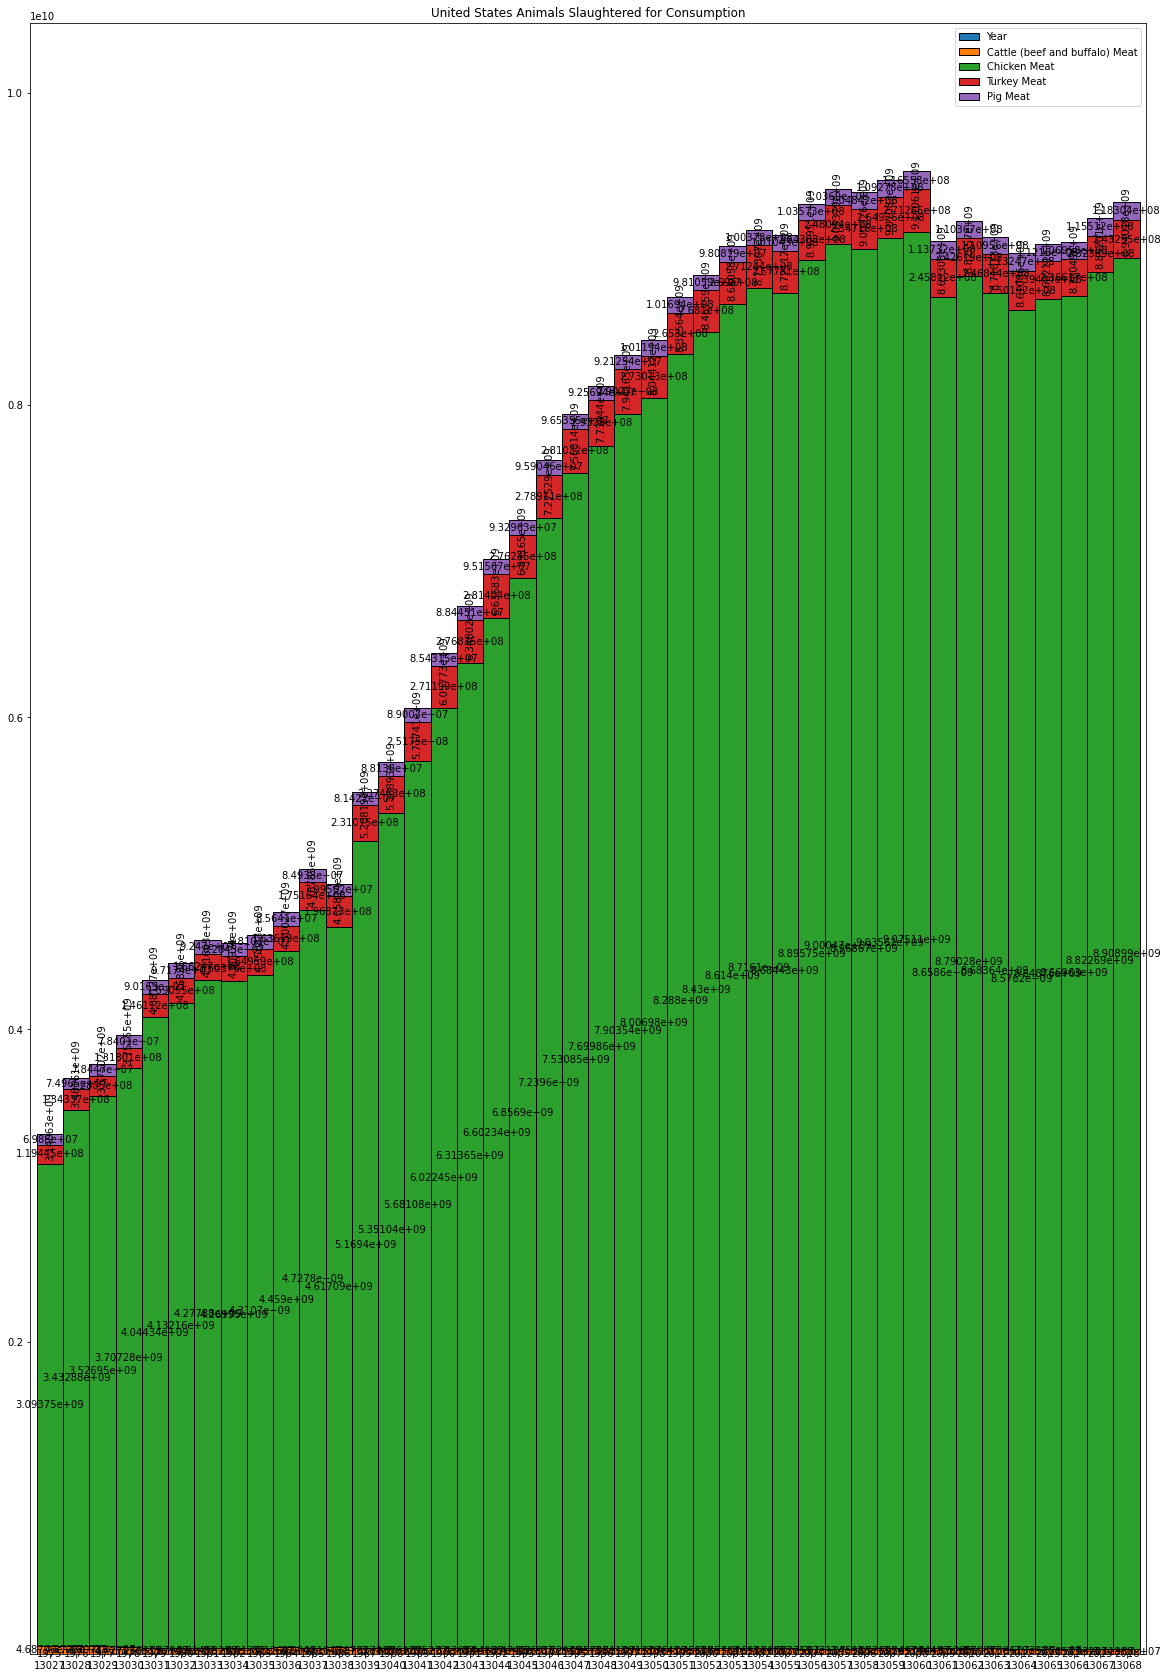

In [17]:
#cd = dict(zip(us_slaughtered2.columns))

# plot the medals columns
title = 'United States Animals Slaughtered for Consumption'
ax = us_slaughtered2.iloc[:, :-1].plot(kind='bar', stacked=True,  title=title,
                          figsize=(20,30), rot=0, width=1, ec='k' )

# annotate each container with individual values
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    
# annotate the top containers with the cumulative sum
ax.bar_label(ax.containers[2], padding=3,rotation=90)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [18]:
global_production

Entity Code  Year  \
0      Afghanistan  AFG  1961   
1      Afghanistan  AFG  1962   
2      Afghanistan  AFG  1963   
3      Afghanistan  AFG  1964   
4      Afghanistan  AFG  1965   
...            ...  ...   ...   
13843     Zimbabwe  ZWE  2016   
13844     Zimbabwe  ZWE  2017   
13845     Zimbabwe  ZWE  2018   
13846     Zimbabwe  ZWE  2019   
13847     Zimbabwe  ZWE  2020   

       Meat, game | 00001163 || Production | 005510 || tonnes  \
0                                                 4000.0        
1                                                 4000.0        
2                                                 5000.0        
3                                                 5000.0        
4                                                 6000.0        
...                                                  ...        
13843                                            35935.0        
13844                                            36328.0        
13845                                            36418.0        
13846                                            36623.0        
13847                                            36828.0        

       Meat, duck | 00001069 || Production | 005510 || tonnes  \
0                                                    NaN        
1                                                    NaN        
2                                                    NaN        
3                                                    NaN        
4                                                    NaN        
...                                                  ...        
13843                                               57.0        
13844                                               56.0        
13845                                               54.0        
13846                                               52.0        
13847                                               51.0        

       Meat, horse | 00001097 || Production | 005510 || tonnes  \
0                                                    NaN         
1                                                    NaN         
2                                                    NaN         
3                                                    NaN         
4                                                    NaN         
...                                                  ...         
13843                                                NaN         
13844                                                NaN         
13845                                                NaN         
13846                                                NaN         
13847                                                NaN         

       Meat, camel | 00001127 || Production | 005510 || tonnes  \
0                                                 3600.0         
1                                                 4031.0         
2                                                 5031.0         
3                                                 4680.0         
4                                                 4320.0         
...                                                  ...         
13843                                                NaN         
13844                                                NaN         
13845                                                NaN         
13846                                                NaN         
13847                                                NaN         

       Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes  \
0                                                    NaN                         
1                                                    NaN                         
2                                                    NaN                         
3                                                    NaN                         
4                                                    NaN 

In [19]:
mask=(global_production['Year']>= 1975)&(animals_slaughtered['Year']<= 2016)
global_production=global_production[mask]
global_production

C:\Users\sgool\AppData\Local\Temp\ipykernel_8892\1349969725.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Entity Code  Year  \
14     Afghanistan  AFG  1975   
15     Afghanistan  AFG  1976   
16     Afghanistan  AFG  1977   
17     Afghanistan  AFG  1978   
18     Afghanistan  AFG  1979   
...            ...  ...   ...   
13843     Zimbabwe  ZWE  2016   
13844     Zimbabwe  ZWE  2017   
13845     Zimbabwe  ZWE  2018   
13846     Zimbabwe  ZWE  2019   
13847     Zimbabwe  ZWE  2020   

       Meat, game | 00001163 || Production | 005510 || tonnes  \
14                                                8600.0        
15                                                8800.0        
16                                               10500.0        
17                                                9600.0        
18                                                9700.0        
...                                                  ...        
13843                                            35935.0        
13844                                            36328.0        
13845                                            36418.0        
13846                                            36623.0        
13847                                            36828.0        

       Meat, duck | 00001069 || Production | 005510 || tonnes  \
14                                                   NaN        
15                                                   NaN        
16                                                   NaN        
17                                                   NaN        
18                                                   NaN        
...                                                  ...        
13843                                               57.0        
13844                                               56.0        
13845                                               54.0        
13846                                               52.0        
13847                                               51.0        

       Meat, horse | 00001097 || Production | 005510 || tonnes  \
14                                                   NaN         
15                                                   NaN         
16                                                   NaN         
17                                                   NaN         
18                                                   NaN         
...                                                  ...         
13843                                                NaN         
13844                                                NaN         
13845                                                NaN         
13846                                                NaN         
13847                                                NaN         

       Meat, camel | 00001127 || Production | 005510 || tonnes  \
14                                                4428.0         
15                                                4428.0         
16                                                4428.0         
17                                                5400.0         
18                                                3978.0         
...                                                  ...         
13843                                                NaN         
13844                                                NaN         
13845                                                NaN         
13846                                                NaN         
13847                                                NaN         

       Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes  \
14                                                   NaN                         
15                                                   NaN                         
16                                                   NaN                         
17                                                   NaN                         
18                                                   NaN 

### Grouped by Country and averaged meat types 

In [20]:
global_by_country=global_production.groupby('Entity')['Meat, game | 00001163 || Production | 005510 || tonnes','Meat, duck | 00001069 || Production | 005510 || tonnes','Meat, horse | 00001097 || Production | 005510 || tonnes','Meat, camel | 00001127 || Production | 005510 || tonnes','Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes','Meat, sheep and goat | 00001807 || Production | 005510 || tonnes','Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes','Meat, pig | 00001035 || Production | 005510 || tonnes','Meat, poultry | 00001808 || Production | 005510 || tonnes'].mean().reset_index()
global_by_country=pd.DataFrame(global_by_country)
global_by_country

C:\Users\sgool\AppData\Local\Temp\ipykernel_8892\1293200565.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Entity  Meat, game | 00001163 || Production | 005510 || tonnes  \
0     Afghanistan                                       7.959881e+03        
1          Africa                                       7.737326e+05        
2    Africa (FAO)                                       7.805580e+05        
3         Albania                                                NaN        
4         Algeria                                                NaN        
..            ...                                                ...        
248         World                                       1.604759e+06        
249         Yemen                                                NaN        
250    Yugoslavia                                       7.175000e+03        
251        Zambia                                       3.285988e+04        
252      Zimbabwe                                       2.615439e+04        

     Meat, duck | 00001069 || Production | 005510 || tonnes  \
0                                                  NaN        
1                                         5.657750e+04        
2                                         5.657705e+04        
3                                                  NaN        
4                                                  NaN        
..                                                 ...        
248                                       2.743982e+06        
249                                                NaN        
250                                       3.505000e+02        
251                                                NaN        
252                                       6.629268e+01        

     Meat, horse | 00001097 || Production | 005510 || tonnes  \
0                                                  NaN         
1                                         14057.476190         
2                                         14057.357143         
3                                                  NaN         
4                                           781.142857         
..                                                 ...         
248                                      660177.585366         
249                                                NaN         
250                                         305.166667         
251                                                NaN         
252                                                NaN         

     Meat, camel | 00001127 || Production | 005510 || tonnes  \
0                                          3679.071429         
1                                        154981.476190         
2                                        204285.785714         
3                                                  NaN         
4                                          2885.428571         
..                                                 ...         
248                                      349935.658537         
249                                        2563.243902         
250                                                NaN         
251                                                NaN         
252                                                NaN         

     Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes  \
0                                                  NaN                         
1                                         3.115140e+04                         
2                                         3.115138e+04                         
3                                                  NaN                         
4                                                  NaN                         
..                                                 ...                         
248                                       1.605876e+06                         
249                                                NaN                         
250                                       3.421667e+03                 

### Replaced all NaN values with 0

In [21]:
global_by_country.fillna(0)

Entity  Meat, game | 00001163 || Production | 005510 || tonnes  \
0     Afghanistan                                       7.959881e+03        
1          Africa                                       7.737326e+05        
2    Africa (FAO)                                       7.805580e+05        
3         Albania                                       0.000000e+00        
4         Algeria                                       0.000000e+00        
..            ...                                                ...        
248         World                                       1.604759e+06        
249         Yemen                                       0.000000e+00        
250    Yugoslavia                                       7.175000e+03        
251        Zambia                                       3.285988e+04        
252      Zimbabwe                                       2.615439e+04        

     Meat, duck | 00001069 || Production | 005510 || tonnes  \
0                                         0.000000e+00        
1                                         5.657750e+04        
2                                         5.657705e+04        
3                                         0.000000e+00        
4                                         0.000000e+00        
..                                                 ...        
248                                       2.743982e+06        
249                                       0.000000e+00        
250                                       3.505000e+02        
251                                       0.000000e+00        
252                                       6.629268e+01        

     Meat, horse | 00001097 || Production | 005510 || tonnes  \
0                                             0.000000         
1                                         14057.476190         
2                                         14057.357143         
3                                             0.000000         
4                                           781.142857         
..                                                 ...         
248                                      660177.585366         
249                                           0.000000         
250                                         305.166667         
251                                           0.000000         
252                                           0.000000         

     Meat, camel | 00001127 || Production | 005510 || tonnes  \
0                                          3679.071429         
1                                        154981.476190         
2                                        204285.785714         
3                                             0.000000         
4                                          2885.428571         
..                                                 ...         
248                                      349935.658537         
249                                        2563.243902         
250                                           0.000000         
251                                           0.000000         
252                                           0.000000         

     Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes  \
0                                         0.000000e+00                         
1                                         3.115140e+04                         
2                                         3.115138e+04                         
3                                         0.000000e+00                         
4                                         0.000000e+00                         
..                                                 ...                         
248                                       1.605876e+06                         
249                                       0.000000e+00                         
250                                       3.421667e+03                 

In [22]:
us_global=global_production[global_production['Entity']=='United States']
us_global

Entity Code  Year  \
13027  United States  USA  1980   
13028  United States  USA  1981   
13029  United States  USA  1982   
13030  United States  USA  1983   
13031  United States  USA  1984   
13032  United States  USA  1985   
13033  United States  USA  1986   
13034  United States  USA  1987   
13035  United States  USA  1988   
13036  United States  USA  1989   
13037  United States  USA  1990   
13038  United States  USA  1991   
13039  United States  USA  1992   
13040  United States  USA  1993   
13041  United States  USA  1994   
13042  United States  USA  1995   
13043  United States  USA  1996   
13044  United States  USA  1997   
13045  United States  USA  1998   
13046  United States  USA  1999   
13047  United States  USA  2000   
13048  United States  USA  2001   
13049  United States  USA  2002   
13050  United States  USA  2003   
13051  United States  USA  2004   
13052  United States  USA  2005   
13053  United States  USA  2006   
13054  United States  USA  2007   
13055  United States  USA  2008   
13056  United States  USA  2009   
13057  United States  USA  2010   
13058  United States  USA  2011   
13059  United States  USA  2012   
13060  United States  USA  2013   
13061  United States  USA  2014   
13062  United States  USA  2015   
13063  United States  USA  2016   
13064  United States  USA  2017   
13065  United States  USA  2018   
13066  United States  USA  2019   
13067  United States  USA  2020   

       Meat, game | 00001163 || Production | 005510 || tonnes  \
13027                                           220000.0        
13028                                           220000.0        
13029                                           215000.0        
13030                                           215000.0        
13031                                           200000.0        
13032                                           200000.0        
13033                                           200000.0        
13034                                           200000.0        
13035                                           200000.0        
13036                                           200000.0        
13037                                           195894.0        
13038                                           199930.0        
13039                                           206952.0        
13040                                           205850.0        
13041                                           215568.0        
13042                                           220595.0        
13043                                           218617.0        
13044                                           218978.0        
13045                                           228697.0        
13046                                           233748.0        
13047                                           233833.0        
13048                                           231307.0        
13049                                           238910.0        
13050                                           235904.0        
13051                                           228544.0        
13052                                           230074.0        
13053                                           239357.0        
13054                                           245104.0        
13055                                           250741.0        
13056                                           249561.0        
13057                                           248400.0        
13058                                           248400.0        
13059                                           252625.0        
13060                                           254584.0        
13061                                           256062.0        
13062                                           257345.0        
13063                                           258751.0        
13064                                           260000.0        
13065   

In [23]:
us_global=us_global.drop(us_global.columns[[6,7]],axis=1)
us_global

Entity Code  Year  \
13027  United States  USA  1980   
13028  United States  USA  1981   
13029  United States  USA  1982   
13030  United States  USA  1983   
13031  United States  USA  1984   
13032  United States  USA  1985   
13033  United States  USA  1986   
13034  United States  USA  1987   
13035  United States  USA  1988   
13036  United States  USA  1989   
13037  United States  USA  1990   
13038  United States  USA  1991   
13039  United States  USA  1992   
13040  United States  USA  1993   
13041  United States  USA  1994   
13042  United States  USA  1995   
13043  United States  USA  1996   
13044  United States  USA  1997   
13045  United States  USA  1998   
13046  United States  USA  1999   
13047  United States  USA  2000   
13048  United States  USA  2001   
13049  United States  USA  2002   
13050  United States  USA  2003   
13051  United States  USA  2004   
13052  United States  USA  2005   
13053  United States  USA  2006   
13054  United States  USA  2007   
13055  United States  USA  2008   
13056  United States  USA  2009   
13057  United States  USA  2010   
13058  United States  USA  2011   
13059  United States  USA  2012   
13060  United States  USA  2013   
13061  United States  USA  2014   
13062  United States  USA  2015   
13063  United States  USA  2016   
13064  United States  USA  2017   
13065  United States  USA  2018   
13066  United States  USA  2019   
13067  United States  USA  2020   

       Meat, game | 00001163 || Production | 005510 || tonnes  \
13027                                           220000.0        
13028                                           220000.0        
13029                                           215000.0        
13030                                           215000.0        
13031                                           200000.0        
13032                                           200000.0        
13033                                           200000.0        
13034                                           200000.0        
13035                                           200000.0        
13036                                           200000.0        
13037                                           195894.0        
13038                                           199930.0        
13039                                           206952.0        
13040                                           205850.0        
13041                                           215568.0        
13042                                           220595.0        
13043                                           218617.0        
13044                                           218978.0        
13045                                           228697.0        
13046                                           233748.0        
13047                                           233833.0        
13048                                           231307.0        
13049                                           238910.0        
13050                                           235904.0        
13051                                           228544.0        
13052                                           230074.0        
13053                                           239357.0        
13054                                           245104.0        
13055                                           250741.0        
13056                                           249561.0        
13057                                           248400.0        
13058                                           248400.0        
13059                                           252625.0        
13060                                           254584.0        
13061                                           256062.0        
13062                                           257345.0        
13063                                           258751.0        
13064                                           260000.0        
13065   

### Convert tonnes to pounds..

In [24]:
cols=us_global.columns[[3,4,5,6,7,8,9]]
for col in cols:
    us_global[col]=(us_global[col]*2204.62)

In [25]:
us_global

Entity Code  Year  \
13027  United States  USA  1980   
13028  United States  USA  1981   
13029  United States  USA  1982   
13030  United States  USA  1983   
13031  United States  USA  1984   
13032  United States  USA  1985   
13033  United States  USA  1986   
13034  United States  USA  1987   
13035  United States  USA  1988   
13036  United States  USA  1989   
13037  United States  USA  1990   
13038  United States  USA  1991   
13039  United States  USA  1992   
13040  United States  USA  1993   
13041  United States  USA  1994   
13042  United States  USA  1995   
13043  United States  USA  1996   
13044  United States  USA  1997   
13045  United States  USA  1998   
13046  United States  USA  1999   
13047  United States  USA  2000   
13048  United States  USA  2001   
13049  United States  USA  2002   
13050  United States  USA  2003   
13051  United States  USA  2004   
13052  United States  USA  2005   
13053  United States  USA  2006   
13054  United States  USA  2007   
13055  United States  USA  2008   
13056  United States  USA  2009   
13057  United States  USA  2010   
13058  United States  USA  2011   
13059  United States  USA  2012   
13060  United States  USA  2013   
13061  United States  USA  2014   
13062  United States  USA  2015   
13063  United States  USA  2016   
13064  United States  USA  2017   
13065  United States  USA  2018   
13066  United States  USA  2019   
13067  United States  USA  2020   

       Meat, game | 00001163 || Production | 005510 || tonnes  \
13027                                       4.850164e+08        
13028                                       4.850164e+08        
13029                                       4.739933e+08        
13030                                       4.739933e+08        
13031                                       4.409240e+08        
13032                                       4.409240e+08        
13033                                       4.409240e+08        
13034                                       4.409240e+08        
13035                                       4.409240e+08        
13036                                       4.409240e+08        
13037                                       4.318718e+08        
13038                                       4.407697e+08        
13039                                       4.562505e+08        
13040                                       4.538210e+08        
13041                                       4.752455e+08        
13042                                       4.863281e+08        
13043                                       4.819674e+08        
13044                                       4.827633e+08        
13045                                       5.041900e+08        
13046                                       5.153255e+08        
13047                                       5.155129e+08        
13048                                       5.099440e+08        
13049                                       5.267058e+08        
13050                                       5.200787e+08        
13051                                       5.038527e+08        
13052                                       5.072257e+08        
13053                                       5.276912e+08        
13054                                       5.403612e+08        
13055                                       5.527886e+08        
13056                                       5.501872e+08        
13057                                       5.476276e+08        
13058                                       5.476276e+08        
13059                                       5.569421e+08        
13060                                       5.612610e+08        
13061                                       5.645194e+08        
13062                                       5.673479e+08        
13063                                       5.704476e+08        
13064                                       5.732012e+08        
13065   

In [26]:
us_global.rename(columns = {'Meat, game | 00001163 || Production | 005510 || tonnes':'Game Meat','Meat, duck | 00001069 || Production | 005510 || tonnes':'Duck Meat','Meat, horse | 00001097 || Production | 005510 || tonnes':'Horse Meat','Meat, sheep and goat | 00001807 || Production | 005510 || tonnes':'Sheep and Goat Meat','Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes':'Beef and Buffalo Meat','Meat, pig | 00001035 || Production | 005510 || tonnes':'Pig Meat','Meat, poultry | 00001808 || Production | 005510 || tonnes':'Poultry Meat'},inplace=True)

In [27]:
us_global

Entity Code  Year     Game Meat     Duck Meat    Horse Meat  \
13027  United States  USA  1980  4.850164e+08  7.281419e+07  1.510165e+08   
13028  United States  USA  1981  4.850164e+08  8.013794e+07  1.207029e+08   
13029  United States  USA  1982  4.739933e+08  8.786072e+07  8.212210e+07   
13030  United States  USA  1983  4.739933e+08  8.938852e+07  5.456434e+07   
13031  United States  USA  1984  4.409240e+08  8.915924e+07  5.787128e+07   
13032  United States  USA  1985  4.409240e+08  9.735381e+07  7.054784e+07   
13033  United States  USA  1986  4.409240e+08  1.046202e+08  1.096798e+08   
13034  United States  USA  1987  4.409240e+08  1.064942e+08  1.521188e+08   
13035  United States  USA  1988  4.409240e+08  1.124356e+08  1.780231e+08   
13036  United States  USA  1989  4.409240e+08  1.010884e+08  1.919673e+08   
13037  United States  USA  1990  4.318718e+08  9.726343e+07  1.906996e+08   
13038  United States  USA  1991  4.407697e+08  9.359714e+07  1.614884e+08   
13039  United States  USA  1992  4.562505e+08  8.724122e+07  1.449538e+08   
13040  United States  USA  1993  4.538210e+08  9.828857e+07  1.025148e+08   
13041  United States  USA  1994  4.752455e+08  9.568051e+07  6.283167e+07   
13042  United States  USA  1995  4.863281e+08  9.306142e+07  6.228052e+07   
13043  United States  USA  1996  4.819674e+08  9.904035e+07  5.732012e+07   
13044  United States  USA  1997  4.827633e+08  1.044130e+08  4.960395e+07   
13045  United States  USA  1998  5.041900e+08  1.100745e+08  4.243894e+07   
13046  United States  USA  1999  5.153255e+08  1.081476e+08  5.732012e+07   
13047  United States  USA  2000  5.155129e+08  1.159784e+08  5.842243e+07   
13048  United States  USA  2001  5.099440e+08  1.241399e+08  6.062705e+07   
13049  United States  USA  2002  5.267058e+08  1.168581e+08  6.613860e+07   
13050  United States  USA  2003  5.200787e+08  1.190076e+08  7.716170e+07   
13051  United States  USA  2004  5.038527e+08  1.280311e+08  3.648646e+07   
13052  United States  USA  2005  5.072257e+08  1.344928e+08  5.180857e+07   
13053  United States  USA  2006  5.276912e+08  1.342834e+08  5.787128e+07   
13054  United States  USA  2007  5.403612e+08  1.316379e+08  5.952474e+07   
13055  United States  USA  2008  5.527886e+08  1.162893e+08  6.089381e+07   
13056  United States  USA  2009  5.501872e+08  1.102067e+08  6.172936e+07   
13057  United States  USA  2010  5.476276e+08  1.159145e+08  6.283167e+07   
13058  United States  USA  2011  5.476276e+08  1.200107e+08  6.283167e+07   
13059  United States  USA  2012  5.569421e+08  1.187805e+08  4.430845e+07   
13060  United States  USA  2013  5.612610e+08  1.213974e+08  4.014172e+07   
13061  United States  USA  2014  5.645194e+08  1.309500e+08  4.715682e+07   
13062  United States  USA  2015  5.673479e+08  1.375595e+08  4.614711e+07   
13063  United States  USA  2016  5.704476e+08  1.358222e+08  4.535565e+07   
13064  United States  USA  2017  5.732012e+08  1.343143e+08  4.437018e+07   
13065  United States  USA  2018  5.767374e+08  1.409369e+08  4.310914e+07   
13066  United States  USA  2019  5.836842e+08  1.413316e+08  4.238602e+07   
13067  United States  USA  2020  5.847512e+08  1.148739e+08  4.259767e+07   

       Sheep and Goat Meat  Beef and Buffalo Meat      Pig Meat  Poultry Meat  
13027         3.179944e+08           2.204397e+10  1.661499e+10  1.430143e+10  
13028         3.379903e+08           2.282443e+10  1.587490e+10  1.521485e+10  
13029         3.649969e+08           2.298316e+10  1.422897e+10  1.526733e+10  
13030         3.759979e+08           2.369085e+10  1.520196e+10  1.565136e+10  
13031         3.799883e+08           2.408988e+10  1.481196e+10  1.625520e+10  
13032         3.571484e+08           2.424200e+10  1.480491e+10  1.703942e+10  
13033         3.379682e+08           2.489457e+10  1.406327e+10  1.809873e+10  
13034         3.152607e+08           2.399508e+10  1.437412e+10  1.990398e+10  
13035         3.351022e+08           2.398406e+10  1.568367

In [28]:
df=us_global
x='Year'

fig=px.bar(df,x=x,y=['Game Meat','Duck Meat','Horse Meat','Sheep and Goat Meat','Beef and Buffalo Meat','Pig Meat','Poultry Meat'] )
fig.show()
py.plot(fig, filename = 'basic-line', auto_open=True)

'https://plotly.com/~sgoolsby88/1/'

In [29]:
fig=px.bar(global_by_country,x='Entity')

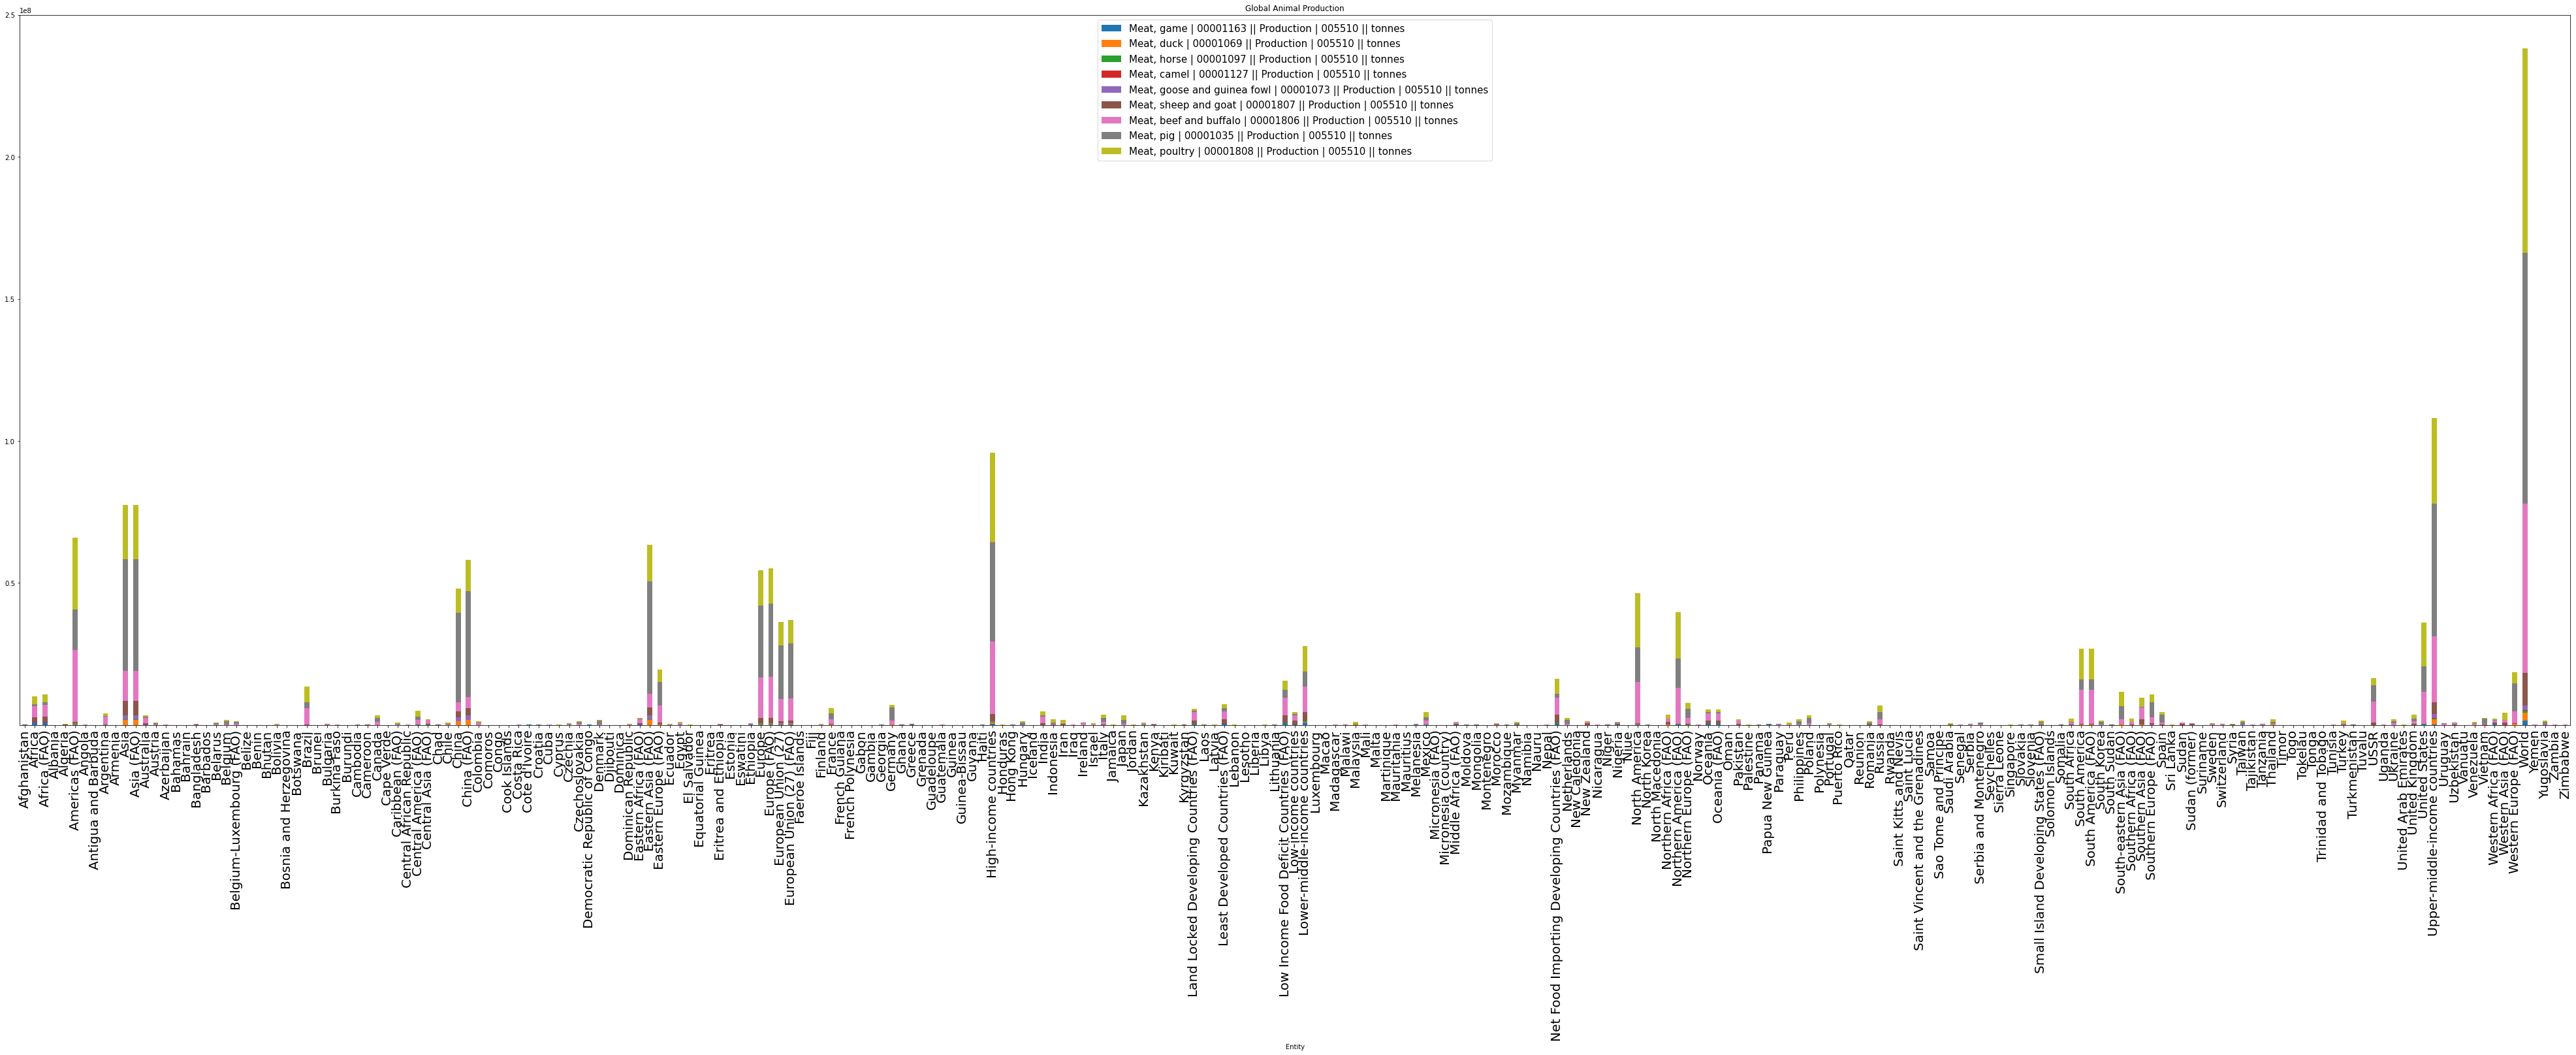

In [30]:
global_by_country.plot(x='Entity',
                    kind='bar',
                    stacked=True,
                    title='Global Animal Production',
                    figsize=(70,20))
plt.legend(loc='upper center', fontsize='x-large',prop={'size':15})
plt.xticks(rotation = 90, size = 20)
plt.savefig('global_animal_production.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [31]:
global_production.isna().sum()

Entity                                                                        0
Code                                                                       1772
Year                                                                          0
Meat, game | 00001163 || Production | 005510 || tonnes                     5565
Meat, duck | 00001069 || Production | 005510 || tonnes                     4753
Meat, horse | 00001097 || Production | 005510 || tonnes                    4877
Meat, camel | 00001127 || Production | 005510 || tonnes                    7103
Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes    6415
Meat, sheep and goat | 00001807 || Production | 005510 || tonnes            368
Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes          162
Meat, pig | 00001035 || Production | 005510 || tonnes                       809
Meat, poultry | 00001808 || Production | 005510 || tonnes                    83
dtype: int64

In [32]:
meat_per_person = pd.read_csv('../data/meat-supply-per-person.csv')

In [33]:
meat_per_person

Entity Code  Year  \
0      Afghanistan  AFG  1961   
1      Afghanistan  AFG  1962   
2      Afghanistan  AFG  1963   
3      Afghanistan  AFG  1964   
4      Afghanistan  AFG  1965   
...            ...  ...   ...   
11023     Zimbabwe  ZWE  2013   
11024     Zimbabwe  ZWE  2014   
11025     Zimbabwe  ZWE  2015   
11026     Zimbabwe  ZWE  2016   
11027     Zimbabwe  ZWE  2017   

       Meat food supply quantity (kg/capita/yr) (FAO, 2020)  
0                                                  14.45     
1                                                  14.46     
2                                                  14.88     
3                                                  15.07     
4                                                  15.38     
...                                                  ...     
11023                                              18.24     
11024                                              17.91     
11025                                              17.81     
11026                                              18.01     
11027                                              17.67     

[11028 rows x 4 columns]

In [34]:
meat_per_person.rename(columns={'Meat food supply quantity (kg/capita/yr) (FAO, 2020)': 'kg/capita/yr'}, inplace=True)

In [35]:
meat_per_person

Entity Code  Year  kg/capita/yr
0      Afghanistan  AFG  1961         14.45
1      Afghanistan  AFG  1962         14.46
2      Afghanistan  AFG  1963         14.88
3      Afghanistan  AFG  1964         15.07
4      Afghanistan  AFG  1965         15.38
...            ...  ...   ...           ...
11023     Zimbabwe  ZWE  2013         18.24
11024     Zimbabwe  ZWE  2014         17.91
11025     Zimbabwe  ZWE  2015         17.81
11026     Zimbabwe  ZWE  2016         18.01
11027     Zimbabwe  ZWE  2017         17.67

[11028 rows x 4 columns]

In [36]:
meat_per_person['lbs/capita/yr']=round(meat_per_person['kg/capita/yr']*2.2046,2)

### Converted kg/capita/yr to Ibs/capita/yr

In [37]:
meat_per_person

Entity Code  Year  kg/capita/yr  lbs/capita/yr
0      Afghanistan  AFG  1961         14.45          31.86
1      Afghanistan  AFG  1962         14.46          31.88
2      Afghanistan  AFG  1963         14.88          32.80
3      Afghanistan  AFG  1964         15.07          33.22
4      Afghanistan  AFG  1965         15.38          33.91
...            ...  ...   ...           ...            ...
11023     Zimbabwe  ZWE  2013         18.24          40.21
11024     Zimbabwe  ZWE  2014         17.91          39.48
11025     Zimbabwe  ZWE  2015         17.81          39.26
11026     Zimbabwe  ZWE  2016         18.01          39.70
11027     Zimbabwe  ZWE  2017         17.67          38.96

[11028 rows x 5 columns]

### Narrowed down between 1975-2016 to match BMI Dataframes.

In [38]:
mask=(meat_per_person['Year']>= 1975)&(meat_per_person['Year']<= 2016)
meat_per_person=meat_per_person[mask]
meat_per_person

Entity Code  Year  kg/capita/yr  lbs/capita/yr
14     Afghanistan  AFG  1975         15.77          34.77
15     Afghanistan  AFG  1976         17.37          38.29
16     Afghanistan  AFG  1977         17.57          38.73
17     Afghanistan  AFG  1978         17.76          39.15
18     Afghanistan  AFG  1979         17.71          39.04
...            ...  ...   ...           ...            ...
11022     Zimbabwe  ZWE  2012         20.40          44.97
11023     Zimbabwe  ZWE  2013         18.24          40.21
11024     Zimbabwe  ZWE  2014         17.91          39.48
11025     Zimbabwe  ZWE  2015         17.81          39.26
11026     Zimbabwe  ZWE  2016         18.01          39.70

[8252 rows x 5 columns]

In [71]:
global_avg=round(meat_per_person.groupby('Year')['lbs/capita/yr'].mean(),2)
global_avg

Year
1975     77.62
1976     79.68
1977     80.49
1978     82.91
1979     83.63
1980     85.15
1981     85.92
1982     86.60
1983     86.36
1984     87.03
1985     87.93
1986     88.36
1987     90.09
1988     90.36
1989     90.13
1990     91.02
1991     92.22
1992     93.12
1993     93.33
1994     93.19
1995     94.39
1996     94.30
1997     94.24
1998     96.16
1999     96.92
2000     98.20
2001     98.34
2002    100.79
2003    101.46
2004    102.65
2005    104.55
2006    104.99
2007    108.93
2008    110.07
2009    109.34
2010    110.20
2011    111.59
2012    111.97
2013    112.50
2014    106.81
2015    106.72
2016    106.29
Name: lbs/capita/yr, dtype: float64

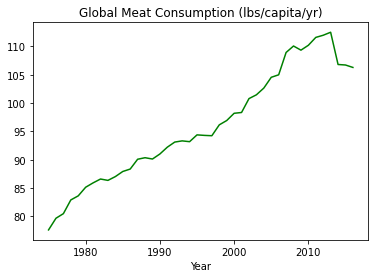

In [40]:
global_avg.plot(x='Year',y='lbs/capita/yr',
                    kind='line',
                    title='Global Meat Consumption (lbs/capita/yr)',legend=False,color='g')
#plt.ylim(20,30)
plt.savefig('global_meat_con.jpg', bbox_inches='tight',pad_inches=0.3,dpi=1200)
plt.show()

In [68]:
global_avg.to_csv('globalavg.csv')

In [41]:
avg_meat_per_person=meat_per_person.groupby('Entity')['lbs/capita/yr'].mean().reset_index()
avg_meat_per_person=pd.DataFrame(avg_meat_per_person)
avg_meat_per_person

Entity  lbs/capita/yr
0    Afghanistan      34.901190
1         Africa      34.077692
2        Albania      65.632143
3        Algeria      36.695714
4       Americas     166.150256
..           ...            ...
211        World      77.434615
212        Yemen      32.193571
213   Yugoslavia     141.298235
214       Zambia      29.582857
215     Zimbabwe      31.289286

[216 rows x 2 columns]

In [42]:
us_avg_mpp=meat_per_person[meat_per_person['Entity']=='United States']
us_avg_mpp

Entity Code  Year  kg/capita/yr  lbs/capita/yr
10370  United States  USA  1975        102.19         225.29
10371  United States  USA  1976        109.04         240.39
10372  United States  USA  1977        108.74         239.73
10373  United States  USA  1978        106.90         235.67
10374  United States  USA  1979        106.59         234.99
10375  United States  USA  1980        108.32         238.80
10376  United States  USA  1981        108.48         239.16
10377  United States  USA  1982        105.65         232.92
10378  United States  USA  1983        108.47         239.13
10379  United States  USA  1984        108.76         239.77
10380  United States  USA  1985        110.34         243.26
10381  United States  USA  1986        110.59         243.81
10382  United States  USA  1987        111.30         245.37
10383  United States  USA  1988        113.91         251.13
10384  United States  USA  1989        112.75         248.57
10385  United States  USA  1990        112.69         248.44
10386  United States  USA  1991        114.27         251.92
10387  United States  USA  1992        117.41         258.84
10388  United States  USA  1993        116.48         256.79
10389  United States  USA  1994        119.00         262.35
10390  United States  USA  1995        118.13         260.43
10391  United States  USA  1996        117.85         259.81
10392  United States  USA  1997        116.88         257.67
10393  United States  USA  1998        120.40         265.43
10394  United States  USA  1999        123.81         272.95
10395  United States  USA  2000        121.68         268.26
10396  United States  USA  2001        120.78         266.27
10397  United States  USA  2002        124.39         274.23
10398  United States  USA  2003        123.17         271.54
10399  United States  USA  2004        125.76         277.25
10400  United States  USA  2005        125.30         276.24
10401  United States  USA  2006        125.53         276.74
10402  United States  USA  2007        125.47         276.61
10403  United States  USA  2008        122.61         270.31
10404  United States  USA  2009        118.70         261.69
10405  United States  USA  2010        118.82         261.95
10406  United States  USA  2011        116.29         256.37
10407  United States  USA  2012        114.91         253.33
10408  United States  USA  2013        115.13         253.82
10409  United States  USA  2014        117.56         259.17
10410  United States  USA  2015        120.86         266.45
10411  United States  USA  2016        122.86         270.86

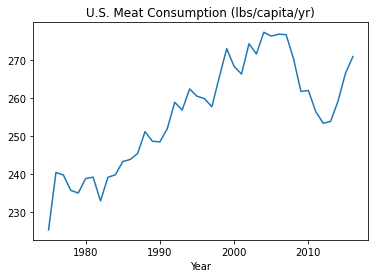

In [43]:
us_avg_mpp.plot(x='Year',y='lbs/capita/yr',
                    kind='line',
                    title='U.S. Meat Consumption (lbs/capita/yr)',legend=False)
#plt.ylim(20,30)
plt.savefig('us_meat_con.jpg', bbox_inches='tight',pad_inches=0.3,dpi=1200)
plt.show()

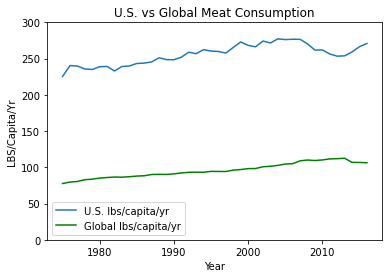

In [44]:
ax=us_avg_mpp.plot(kind='line',x='Year',y='lbs/capita/yr',label='U.S. lbs/capita/yr')
global_avg.plot(kind='line',ax=ax,x='Year',y='lbs/capita/yr',label='Global lbs/capita/yr',color='g')
plt.legend()
plt.ylim([0,300])
plt.title('U.S. vs Global Meat Consumption')
plt.ylabel('LBS/Capita/Yr')
plt.savefig('us_vs_globe_meat_con.jpg', bbox_inches='tight',pad_inches=0.3,dpi=1200)
plt.show()

In [67]:
us_avg_mpp.to_csv('usavgmpp.csv')

In [45]:
df=us_global
x='Year'

fig=px.bar(df,x=x,y=['Game Meat','Duck Meat','Horse Meat','Sheep and Goat Meat','Beef and Buffalo Meat','Pig Meat','Poultry Meat'] )
fig.show()
py.plot(fig, filename = 'basic-line', auto_open=True)

'https://plotly.com/~sgoolsby88/1/'

### Showing avg meat/person by country from 1975-2016

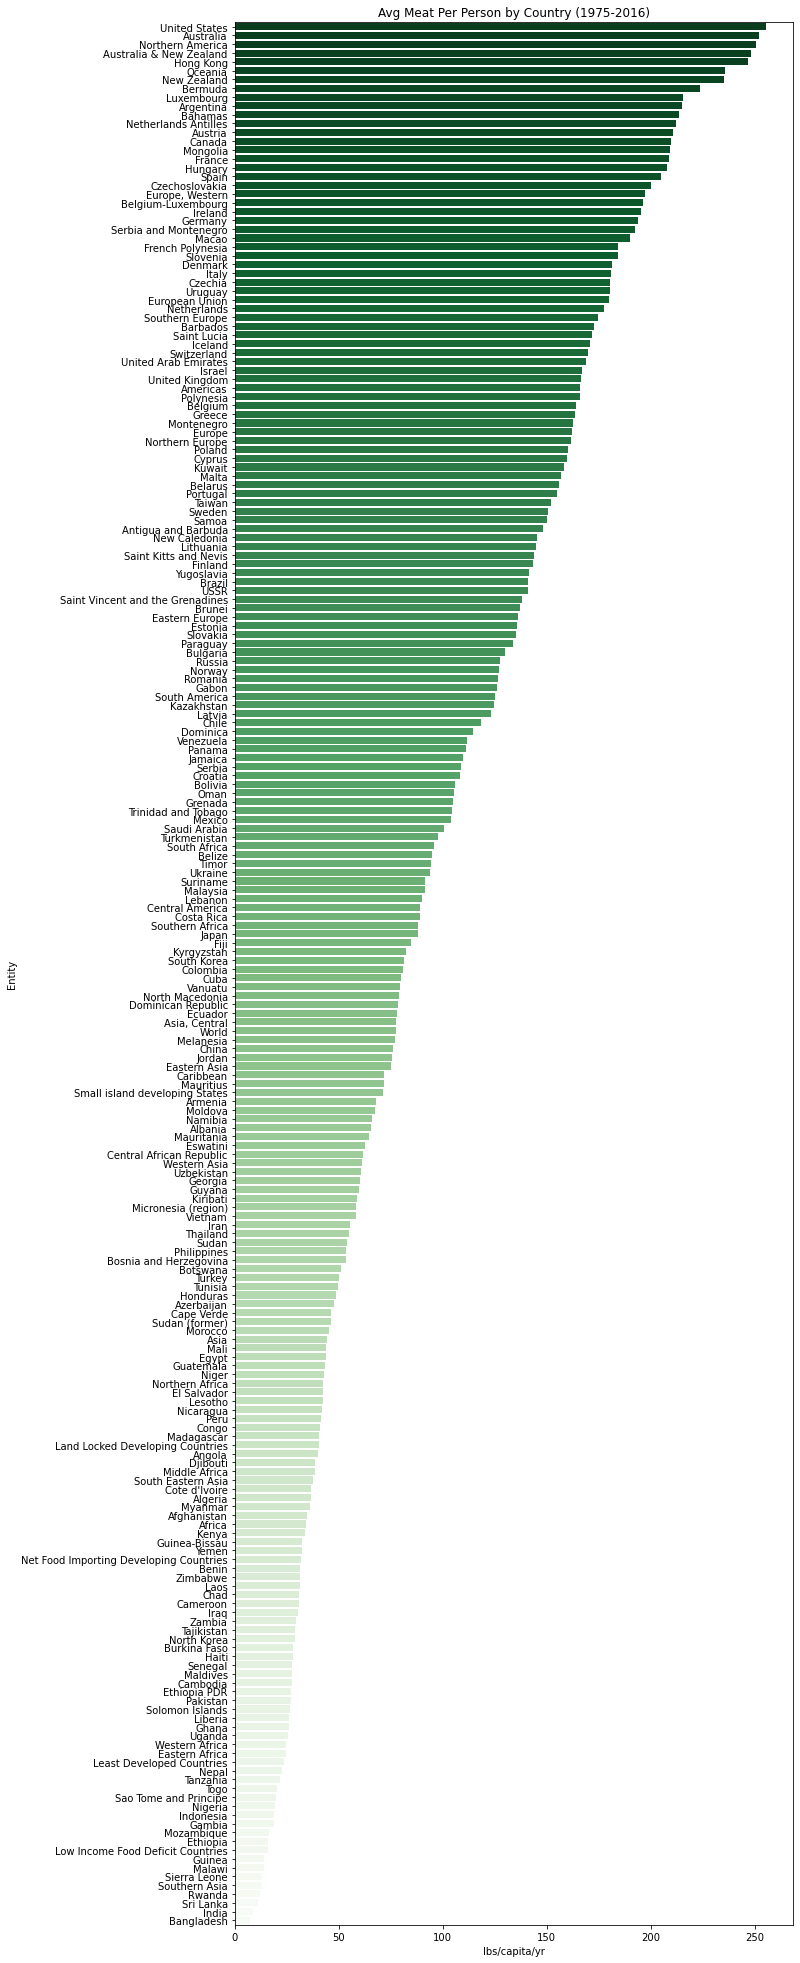

In [46]:
df=avg_meat_per_person.sort_values('lbs/capita/yr', ascending=False)
figure(num=None, figsize=(10,35), facecolor='w', edgecolor='r')
plt.title("Avg Meat Per Person by Country (1975-2016)")
sns.barplot(data=df,x='lbs/capita/yr', y='Entity', palette='Greens_r')
plt.savefig('Avg_per_person_per_country1.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

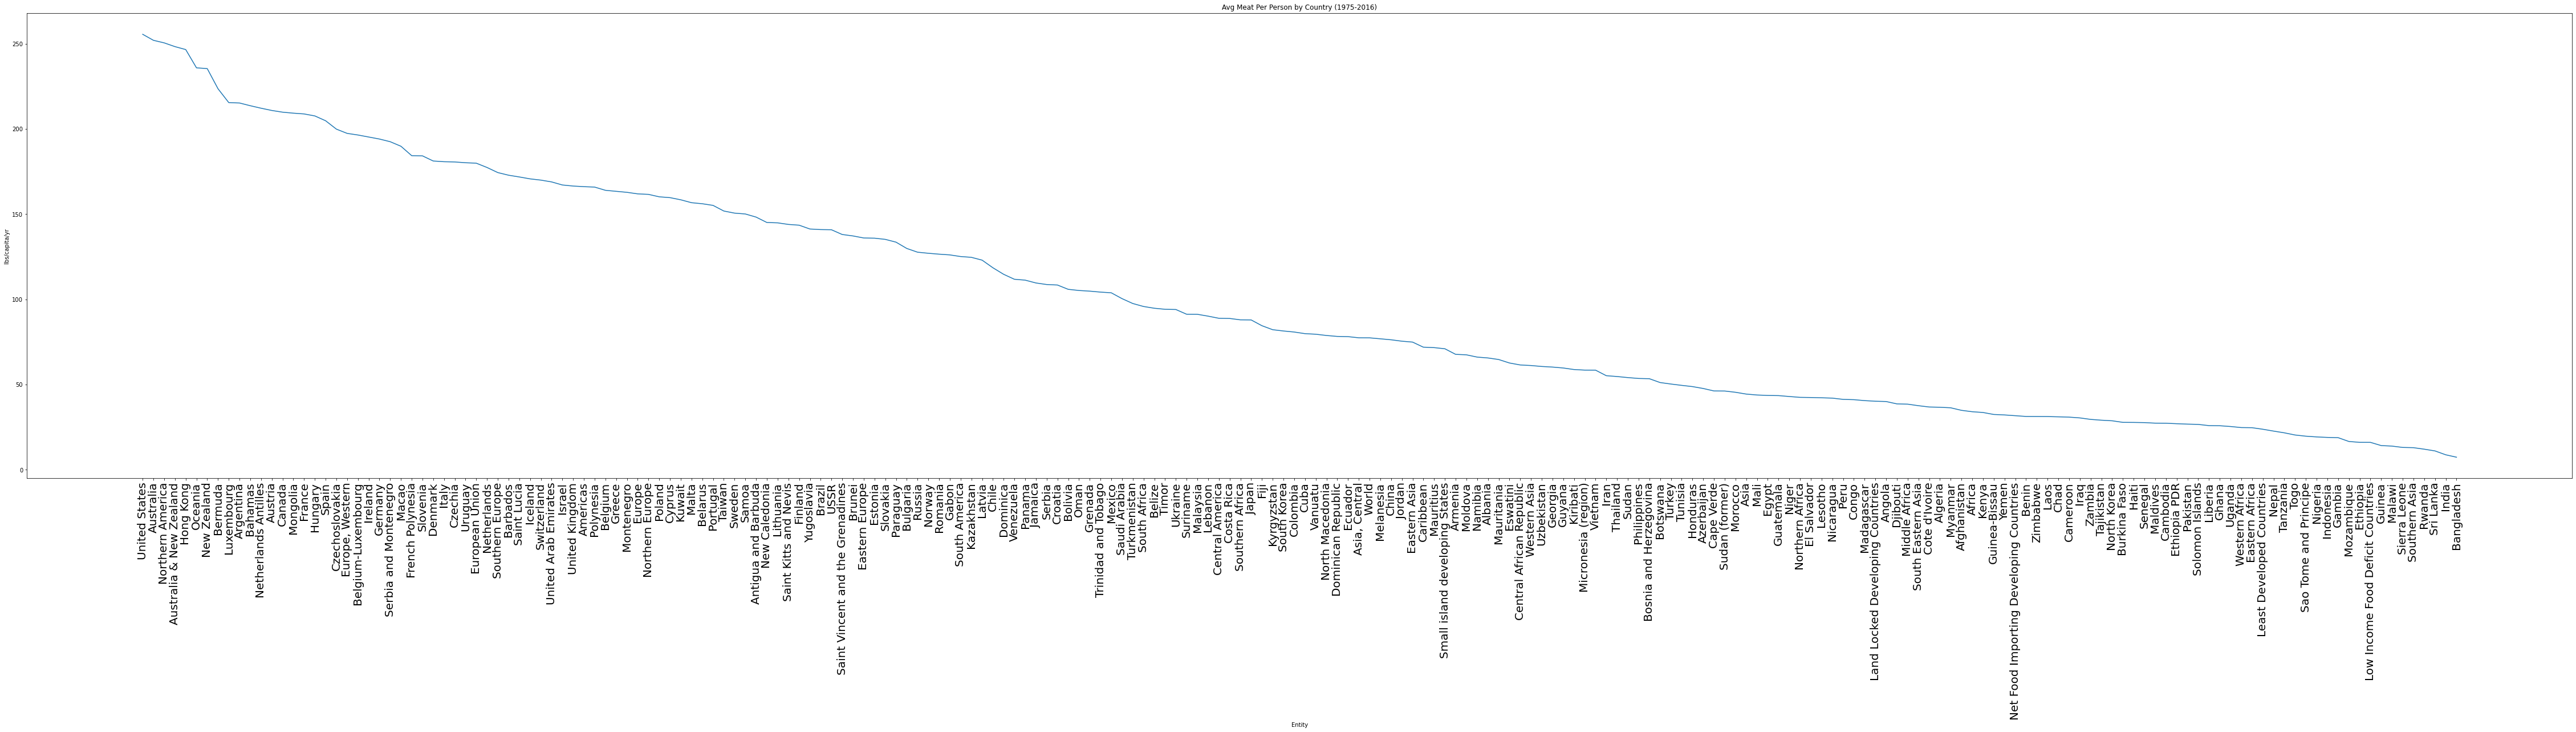

In [47]:
df=avg_meat_per_person.sort_values('lbs/capita/yr', ascending=False)
figure(num=None, figsize=(80,15), facecolor='w', edgecolor='r')
plt.title("Avg Meat Per Person by Country (1975-2016)")
sns.lineplot(data=df,y='lbs/capita/yr', x='Entity')
plt.xticks(rotation = 90, size = 20)
plt.savefig('Avg_per_person_per_country.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

### Top 10 countries - avg meat per person 

In [48]:
top_avg=avg_meat_per_person.sort_values('lbs/capita/yr',ascending=False)

In [49]:
print(top_avg[top_avg['Entity']=='Nauru'].index.values)

[]


In [50]:
top_10_avg=top_avg.head(10)
top_10_avg

Entity  lbs/capita/yr
203            United States     255.564524
11                 Australia     252.027143
144         Northern America     250.521026
12   Australia & New Zealand     248.323846
84                 Hong Kong     246.601190
147                  Oceania     235.875128
137              New Zealand     235.425000
23                   Bermuda     223.599487
111               Luxembourg     215.475294
7                  Argentina     215.243571

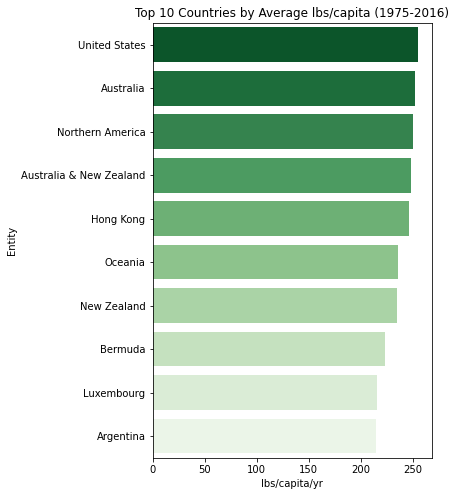

In [51]:

figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Top 10 Countries by Average lbs/capita (1975-2016)")
sns.barplot(data=top_10_avg,x='lbs/capita/yr', y='Entity', palette='Greens_r')
plt.savefig('top_10.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [52]:
bottom_10=avg_meat_per_person.sort_values('lbs/capita/yr',ascending=True)
bottom_10_avg=bottom_10.head(10)
bottom_10_avg

Entity  lbs/capita/yr
16                          Bangladesh       7.391905
87                               India       8.806905
182                          Sri Lanka      11.082143
159                             Rwanda      12.103333
179                      Southern Asia      12.978462
169                       Sierra Leone      13.127619
114                             Malawi      13.914286
79                              Guinea      14.222857
110  Low Income Food Deficit Countries      16.108718
62                            Ethiopia      16.119167

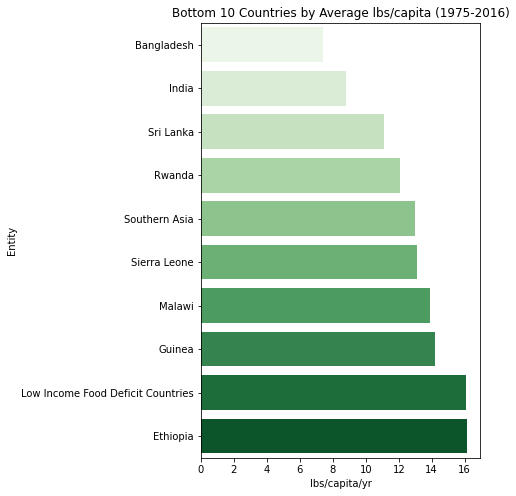

In [53]:
figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Bottom 10 Countries by Average lbs/capita (1975-2016)")
sns.barplot(data=bottom_10_avg,x='lbs/capita/yr', y='Entity', palette='Greens')
plt.savefig('bottom_10.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [54]:
dp_live = pd.read_csv('../data/DP_LIVE_26102022231245819.csv')

In [55]:
dp_live.head(20)

LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME   Value  Flag Codes
0       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000         NaN
1       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.942         NaN
2       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.405         NaN
3       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.370         NaN
4       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.662         NaN
5       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1995  25.526         NaN
6       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1996  27.453         NaN
7       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1997  29.000         NaN
8       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1998  26.765         NaN
9       AUS  MEATCONSUMP    BEEF  KG_CAP         A  1999  28.095         NaN
10      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2000  26.515         NaN
11      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2001  24.606         NaN
12      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2002  25.263         NaN
13      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2003  25.958         NaN
14      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2004  28.719         NaN
15      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2005  27.190         NaN
16      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2006  27.030         NaN
17      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2007  24.166         NaN
18      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2008  23.343         NaN
19      AUS  MEATCONSUMP    BEEF  KG_CAP         A  2009  23.454         NaN

In [56]:
nauru_animals_slaughtered=animals_slaughtered[animals_slaughtered['Entity']=='Nauru'].copy()
nauru_animals_slaughtered

Entity Code  Year  Cattle (beef and buffalo) Meat  Goat Meat  \
8243  Nauru  NRU  1975                             NaN        NaN   
8244  Nauru  NRU  1976                             NaN        NaN   
8245  Nauru  NRU  1977                             NaN        NaN   
8246  Nauru  NRU  1978                             NaN        NaN   
8247  Nauru  NRU  1979                             NaN        NaN   
8248  Nauru  NRU  1980                             NaN        NaN   
8249  Nauru  NRU  1981                             NaN        NaN   
8250  Nauru  NRU  1982                             NaN        NaN   
8251  Nauru  NRU  1983                             NaN        NaN   
8252  Nauru  NRU  1984                             NaN        NaN   
8253  Nauru  NRU  1985                             NaN        NaN   
8254  Nauru  NRU  1986                             NaN        NaN   
8255  Nauru  NRU  1987                             NaN        NaN   
8256  Nauru  NRU  1988                             NaN        NaN   
8257  Nauru  NRU  1989                             NaN        NaN   
8258  Nauru  NRU  1990                             NaN        NaN   
8259  Nauru  NRU  1991                             NaN        NaN   
8260  Nauru  NRU  1992                             NaN        NaN   
8261  Nauru  NRU  1993                             NaN        NaN   
8262  Nauru  NRU  1994                             NaN        NaN   
8263  Nauru  NRU  1995                             NaN        NaN   
8264  Nauru  NRU  1996                             NaN        NaN   
8265  Nauru  NRU  1997                             NaN        NaN   
8266  Nauru  NRU  1998                             NaN        NaN   
8267  Nauru  NRU  1999                             NaN        NaN   
8268  Nauru  NRU  2000                             NaN        NaN   
8269  Nauru  NRU  2001                             NaN        NaN   
8270  Nauru  NRU  2002                             NaN        NaN   
8271  Nauru  NRU  2003                             NaN        NaN   
8272  Nauru  NRU  2004                             NaN        NaN   
8273  Nauru  NRU  2005                             NaN        NaN   
8274  Nauru  NRU  2006                             NaN        NaN   
8275  Nauru  NRU  2007                             NaN        NaN   
8276  Nauru  NRU  2008                             NaN        NaN   
8277  Nauru  NRU  2009                             NaN        NaN   
8278  Nauru  NRU  2010                             NaN        NaN   
8279  Nauru  NRU  2011                             NaN        NaN   
8280  Nauru  NRU  2012                             NaN        NaN   
8281  Nauru  NRU  2013                             NaN        NaN   
8282  Nauru  NRU  2014                             NaN        NaN   
8283  Nauru  NRU  2015                             NaN        NaN   
8284  Nauru  NRU  2016                             NaN        NaN   

      Chicken Meat  Turkey Meat  Pig Meat  Lamb and Mutton Meat  
8243        4000.0          NaN    1200.0                   NaN  
8244        3000.0          NaN    1000.0                   NaN  
8245        3000.0          NaN    1000.0                   NaN  
8246        3000.0          NaN    1200.0                   NaN  
8247        3000.0          NaN    1250.0                   NaN  
8248        4000.0          NaN    1300.0                   NaN  
8249        4000.0          NaN    1500.0                   NaN  
8250        4000.0          NaN    1600.0                   NaN  
8251        4000.0          NaN    1700.0                   NaN  
8252        4000.0          NaN    1500.0                   NaN  
8253        4000.0          NaN    1600.0                   NaN  
8254        5000.0          NaN    1700.0                   NaN  
8255        5000.0          NaN    1800.0                   NaN  
8256        5000.0          NaN    1900.0                   NaN  
8257        5000.0          NaN    1900.0      

In [57]:
nauru_animals_slaughtered=nauru_animals_slaughtered[['Year','Cattle (beef and buffalo) Meat','Goat Meat','Chicken Meat','Turkey Meat','Pig Meat']].copy()
nauru_animals_slaughtered

Year  Cattle (beef and buffalo) Meat  Goat Meat  Chicken Meat  \
8243  1975                             NaN        NaN        4000.0   
8244  1976                             NaN        NaN        3000.0   
8245  1977                             NaN        NaN        3000.0   
8246  1978                             NaN        NaN        3000.0   
8247  1979                             NaN        NaN        3000.0   
8248  1980                             NaN        NaN        4000.0   
8249  1981                             NaN        NaN        4000.0   
8250  1982                             NaN        NaN        4000.0   
8251  1983                             NaN        NaN        4000.0   
8252  1984                             NaN        NaN        4000.0   
8253  1985                             NaN        NaN        4000.0   
8254  1986                             NaN        NaN        5000.0   
8255  1987                             NaN        NaN        5000.0   
8256  1988                             NaN        NaN        5000.0   
8257  1989                             NaN        NaN        5000.0   
8258  1990                             NaN        NaN        5000.0   
8259  1991                             NaN        NaN        5000.0   
8260  1992                             NaN        NaN        5000.0   
8261  1993                             NaN        NaN        5000.0   
8262  1994                             NaN        NaN        5000.0   
8263  1995                             NaN        NaN        5000.0   
8264  1996                             NaN        NaN        5000.0   
8265  1997                             NaN        NaN        5000.0   
8266  1998                             NaN        NaN        5000.0   
8267  1999                             NaN        NaN        5000.0   
8268  2000                             NaN        NaN        5000.0   
8269  2001                             NaN        NaN        5000.0   
8270  2002                             NaN        NaN        5000.0   
8271  2003                             NaN        NaN        5000.0   
8272  2004                             NaN        NaN        5000.0   
8273  2005                             NaN        NaN        5000.0   
8274  2006                             NaN        NaN        5000.0   
8275  2007                             NaN        NaN        5000.0   
8276  2008                             NaN        NaN        5000.0   
8277  2009                             NaN        NaN        5000.0   
8278  2010                             NaN        NaN        5000.0   
8279  2011                             NaN        NaN        5000.0   
8280  2012                             NaN        NaN        5000.0   
8281  2013                             NaN        NaN        5000.0   
8282  2014                             NaN        NaN        5000.0   
8283  2015                             NaN        NaN        5000.0   
8284  2016                             NaN        NaN        5000.0   

      Turkey Meat  Pig Meat  
8243          NaN    1200.0  
8244          NaN    1000.0  
8245          NaN    1000.0  
8246          NaN    1200.0  
8247          NaN    1250.0  
8248          NaN    1300.0  
8249          NaN    1500.0  
8250          NaN    1600.0  
8251          NaN    1700.0  
8252          NaN    1500.0  
8253          NaN    1600.0  
8254          NaN    1700.0  
8255          NaN    1800.0  
8256          NaN    1900.0  
8257          NaN    1900.0  
8258          NaN    2000.0  
8259          NaN    2100.0  
8260          NaN    2200.0  
8261          NaN    2300.0  
8262          NaN    2300.0  
8263          NaN    2300.0  
8264          NaN    2300.0  
8265          NaN    2300.0  
8266          NaN    2300.0  
8267          NaN    2300.0  
8268          NaN    2300.0  
8269          NaN    2300.0  
8270          NaN    2300.0  
8271          NaN    2300.0  
8272          NaN    2297.0  
8273          NaN    2

In [58]:
nauru_animals_slaughtered['Total Animals Slaughtered']=nauru_animals_slaughtered.sum(axis=1)
nauru_animals_slaughtered

Year  Cattle (beef and buffalo) Meat  Goat Meat  Chicken Meat  \
8243  1975                             NaN        NaN        4000.0   
8244  1976                             NaN        NaN        3000.0   
8245  1977                             NaN        NaN        3000.0   
8246  1978                             NaN        NaN        3000.0   
8247  1979                             NaN        NaN        3000.0   
8248  1980                             NaN        NaN        4000.0   
8249  1981                             NaN        NaN        4000.0   
8250  1982                             NaN        NaN        4000.0   
8251  1983                             NaN        NaN        4000.0   
8252  1984                             NaN        NaN        4000.0   
8253  1985                             NaN        NaN        4000.0   
8254  1986                             NaN        NaN        5000.0   
8255  1987                             NaN        NaN        5000.0   
8256  1988                             NaN        NaN        5000.0   
8257  1989                             NaN        NaN        5000.0   
8258  1990                             NaN        NaN        5000.0   
8259  1991                             NaN        NaN        5000.0   
8260  1992                             NaN        NaN        5000.0   
8261  1993                             NaN        NaN        5000.0   
8262  1994                             NaN        NaN        5000.0   
8263  1995                             NaN        NaN        5000.0   
8264  1996                             NaN        NaN        5000.0   
8265  1997                             NaN        NaN        5000.0   
8266  1998                             NaN        NaN        5000.0   
8267  1999                             NaN        NaN        5000.0   
8268  2000                             NaN        NaN        5000.0   
8269  2001                             NaN        NaN        5000.0   
8270  2002                             NaN        NaN        5000.0   
8271  2003                             NaN        NaN        5000.0   
8272  2004                             NaN        NaN        5000.0   
8273  2005                             NaN        NaN        5000.0   
8274  2006                             NaN        NaN        5000.0   
8275  2007                             NaN        NaN        5000.0   
8276  2008                             NaN        NaN        5000.0   
8277  2009                             NaN        NaN        5000.0   
8278  2010                             NaN        NaN        5000.0   
8279  2011                             NaN        NaN        5000.0   
8280  2012                             NaN        NaN        5000.0   
8281  2013                             NaN        NaN        5000.0   
8282  2014                             NaN        NaN        5000.0   
8283  2015                             NaN        NaN        5000.0   
8284  2016                             NaN        NaN        5000.0   

      Turkey Meat  Pig Meat  Total Animals Slaughtered  
8243          NaN    1200.0                     7175.0  
8244          NaN    1000.0                     5976.0  
8245          NaN    1000.0                     5977.0  
8246          NaN    1200.0                     6178.0  
8247          NaN    1250.0                     6229.0  
8248          NaN    1300.0                     7280.0  
8249          NaN    1500.0                     7481.0  
8250          NaN    1600.0                     7582.0  
8251          NaN    1700.0                     7683.0  
8252          NaN    1500.0                     7484.0  
8253          NaN    1600.0                     7585.0  
8254          NaN    1700.0                     8686.0  
8255          NaN    1800.0                     8787.0  
8256          NaN    1900.0                     8888.0  
8257          NaN    1900.0                     8889.0  
8258          NaN    2000.0             

In [59]:
nauru_animals_slaughtered_total=nauru_animals_slaughtered[['Year','Total Animals Slaughtered']].copy()
nauru_animals_slaughtered_total

Year  Total Animals Slaughtered
8243  1975                     7175.0
8244  1976                     5976.0
8245  1977                     5977.0
8246  1978                     6178.0
8247  1979                     6229.0
8248  1980                     7280.0
8249  1981                     7481.0
8250  1982                     7582.0
8251  1983                     7683.0
8252  1984                     7484.0
8253  1985                     7585.0
8254  1986                     8686.0
8255  1987                     8787.0
8256  1988                     8888.0
8257  1989                     8889.0
8258  1990                     8990.0
8259  1991                     9091.0
8260  1992                     9192.0
8261  1993                     9293.0
8262  1994                     9294.0
8263  1995                     9295.0
8264  1996                     9296.0
8265  1997                     9297.0
8266  1998                     9298.0
8267  1999                     9299.0
8268  2000                     9300.0
8269  2001                     9301.0
8270  2002                     9302.0
8271  2003                     9303.0
8272  2004                     9301.0
8273  2005                     9302.0
8274  2006                     9306.0
8275  2007                     9407.0
8276  2008                     9478.0
8277  2009                     9467.0
8278  2010                     9460.0
8279  2011                     9460.0
8280  2012                     9461.0
8281  2013                     9461.0
8282  2014                     9500.0
8283  2015                     9502.0
8284  2016                     9506.0

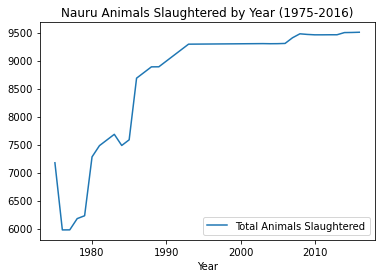

In [60]:
nauru_animals_slaughtered_total.plot(x='Year',
                    kind='line',
                    # linestyle='dotted',
                    title='Nauru Animals Slaughtered by Year (1975-2016)')
plt.legend()
#plt.ylim(0,20)
plt.savefig('nauru_animals_slaughtered.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [61]:
dp_live.drop('Flag Codes',axis=1, inplace=True)

In [62]:
dp_live_us=dp_live[dp_live['LOCATION']=='USA']
dp_live_us

LOCATION    INDICATOR  SUBJECT     MEASURE FREQUENCY  TIME      Value
1120      USA  MEATCONSUMP     BEEF      KG_CAP         A  1990     30.673
1121      USA  MEATCONSUMP     BEEF      KG_CAP         A  1991     30.460
1122      USA  MEATCONSUMP     BEEF      KG_CAP         A  1992     30.359
1123      USA  MEATCONSUMP     BEEF      KG_CAP         A  1993     29.718
1124      USA  MEATCONSUMP     BEEF      KG_CAP         A  1994     30.772
...       ...          ...      ...         ...       ...   ...        ...
7995      USA  MEATCONSUMP  POULTRY  THND_TONNE         A  2025  19691.512
7996      USA  MEATCONSUMP  POULTRY  THND_TONNE         A  2026  19797.082
7997      USA  MEATCONSUMP  POULTRY  THND_TONNE         A  2027  19900.415
7998      USA  MEATCONSUMP  POULTRY  THND_TONNE         A  2028  20007.565
7999      USA  MEATCONSUMP  POULTRY  THND_TONNE         A  2029  20109.668

[320 rows x 7 columns]

In [63]:
dp_live_us_sum=dp_live_us.groupby('SUBJECT')['Value'].sum().reset_index()
dp_live_us_sum=pd.DataFrame(dp_live_us_sum)
dp_live_us_sum

SUBJECT       Value
0     BEEF  484665.451
1      PIG  361858.529
2  POULTRY  638905.036
3    SHEEP    6557.406

In [64]:
dp_live['TIME'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029], dtype=int64)

### Narrowed down to 10 year span (1996-2016) to get closest comparison to rest of data

In [65]:
dp_live

LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME   Value
0          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000
1          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.942
2          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.405
3          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.370
4          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.662
...        ...          ...     ...     ...       ...   ...     ...
12155      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2025   3.861
12156      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2026   3.847
12157      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2027   3.836
12158      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2028   3.826
12159      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2029   3.814

[12160 rows x 7 columns]

In [66]:
mask1=(dp_live['TIME']>= 1996)&(dp_live['TIME']<=2016)
dp_live_10yr=dp_live[mask]
dp_live_10yr

C:\Users\sgool\AppData\Local\Temp\ipykernel_8892\3286418157.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

### Average by location/meat type

In [ ]:
dp_live_10_avg=dp_live_10yr.groupby(['LOCATION','INDICATOR','SUBJECT','MEASURE'])['Value'].mean().reset_index()
dp_live_10_avg=pd.DataFrame(dp_live_10_avg)
dp_live_10_avg

### Keeping only kg/capita measure

In [ ]:
dp_live_10_avg=dp_live_10_avg[dp_live_10_avg['MEASURE']=='KG_CAP']
dp_live_10_avg

### Converted kg/capita to lbs/capita

In [ ]:
dp_live_10_avg

In [ ]:
dp_live_10_avg.plot(x='LOCATION',
                    kind='bar',
                    stacked=True,
                    title='Meat Consumption Type & Location',
                    figsize=(70,20))
#plt.legend(loc='upper center', fontsize='x-large',prop={'size':15})
#plt.xticks(rotation = 90, size = 20)
plt.savefig('dp_live_10_avg.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [ ]:
figure(num=None, figsize=(20,10), facecolor='w', edgecolor='r')
plt.title("10 Year Avg (1996-2016) by Type & Location")
sns.barplot(data=dp_live_10_avg,x='LOCATION', y='lbs/cap', hue='SUBJECT')
plt.savefig('dp_10_avg.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [ ]:
global_by_country